In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
from rdkit.Chem import rdFingerprintGenerator


## FP of agonists

In [3]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('M2OR_dataset.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Initialize the Morgan Fingerprint generator
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']
    
    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue
    
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = morgan_gen.GetFingerprint(mol)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('M2OR_dataset_fp.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(61)


Morgan fingerprint calculation completed!


,Species,Olfactory Receptor,UniProt ID,Molecules,CID,CAS,SMILES,Responsive,Value,Unit,Concentration,Concentration Unit,Fingerprint
0,homo sapiens,OR51D1,Q8NGF3,n-amyl acetate,12348.0,628-63-7,CCCCCOC(=O)C,0,-0.1354006212,NaN,100,uM,0000000000000100000000000000000000000000000000...
1,homo sapiens,OR51D1,Q8NGF3,Cyclohexanone,7967.0,108-94-1,C1CCC(=O)CC1,0,-0.09959109045,NaN,100,uM,0010000000000000000000000000000000000000000000...
2,homo sapiens,OR51D1,Q8NGF3,2-heptanone,8051.0,110-43-0,CCCCCC(=O)C,0,0.06251670451,NaN,100,uM,0000000000000000000000000000000000000000000000...
3,homo sapiens,OR51D1,Q8NGF3,acetophenone,7410.0,98-86-2,CC(=O)C1=CC=CC=C1,0,0.0148320547,NaN,100,uM,0000000000000000000000000000000000000000000000...
4,homo sapiens,OR51D1,Q8NGF3,"2,4,5-trimethyl-2,5-dihydro-1,3-thiazole",181287.0,60633-24-1,CC1C(=NC(S1)C)C,0,-0.007461013215,NaN,100,uM,0000001000000000000000000000000000000000010000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,homo sapiens,OR51D1,Q8NGF3,butyric acid,264.0,107-92-6,CCCC(=O)O,0,0.6519166667,NaN,10,uM,0000000000000000000000000000000000000000000000...
57,homo sapiens,OR51D1,Q8NGF3,butyric acid,264.0,107-92-6,CCCC(=O)O,0,0.8045133333,NaN,100,uM,0000000000000000000000000000000000000000000000...
58,homo sapiens,OR51D1,Q8NGF3,butyric acid,264.0,107-92-6,CCCC(=O)O,1,-4.24421954,log(M),NaN,uM,0000000000000000000000000000000000000000000000...
59,homo sapiens,OR51D1,Q8NGF3,3-Mercaptohexyl acetate,518810.0,NaN,CCCC(CCOC(=O)C)S,0,NaN,NaN,100,uM,0100000000000100000000000000000000000000000000...


In [4]:
import pandas as pd
from rdkit import Chem

# Load the filtered fingerprints CSV file
df = pd.read_csv('M2OR_dataset_fp.csv')

# Create a new column 'Molecule' with RDKit Mol objects
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Define a function to check if a molecule is cyclic
def is_cyclic(mol):
    return any(atom.IsInRing() for atom in mol.GetAtoms())

# Create a new column 'IsCyclic' indicating whether a molecule is cyclic or not
df['IsCyclic'] = df['Molecule'].apply(is_cyclic)

# Filter out cyclic molecules
df_filtered = df[~df['IsCyclic']]

# Save the filtered dataframe to a new CSV file
df_filtered[['SMILES', 'Fingerprint']].to_csv('M2OR_dataset_fp_NOCYC.csv', index=False)

In [5]:
df1 = pd.read_csv('M2OR_dataset_fp_NOCYC.csv')
df1

,SMILES,Fingerprint
0,CCCCCOC(=O)C,0000000000000100000000000000000000000000000000...
1,CCCCCC(=O)C,0000000000000000000000000000000000000000000000...
2,CCCCO,0000000000000000000000000000000000000000000000...
3,CCC(=O)C,0000000000000000000000000000000000000000000000...
4,CCCCCCC/C=C/C=O,0000000000000000000000000000000000000000000000...
...,...,...
389,CCCCCC(=O)C(C)C(=O)C,0100000000000000000000000000000000000000000000...
390,CC/C=C\CCO,0000000000000000000000000000000000000000000000...
391,CC(=CCCC(C)(C=C)O)C,0000000000000000000000000000000000000000000000...
392,CC(=O)C(=O)C CCCC(=O)O CCCCCC1CCCC(=O)O1,0000000000000000000000000000000000000000000000...


## descriptor calculation 

In [6]:
from rdkit.Chem import PandasTools

In [7]:
import os,re,sys,pickle,datetime,time,random,itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import math
from tqdm import tqdm
import seaborn as sns
import umap
from multiprocessing import freeze_support
import mordred
from mordred import Calculator, descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,NMF
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MolFromSmiles, PandasTools, Descriptors, Draw, PropertyMol, rdmolfiles, rdFMCS
from rdkit import RDConfig
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions, Font
DrawingOptions.bondLineWidth=1.8
DrawingOptions.includeAtomNumbers=False
size = (150, 150)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
randomstate = 42

In [8]:
filepath1 = "M2OR_dataset_fp_NOCYC.csv"
mols = pd.read_csv(filepath1)
mols

,SMILES,Fingerprint
0,CCCCCOC(=O)C,0000000000000100000000000000000000000000000000...
1,CCCCCC(=O)C,0000000000000000000000000000000000000000000000...
2,CCCCO,0000000000000000000000000000000000000000000000...
3,CCC(=O)C,0000000000000000000000000000000000000000000000...
4,CCCCCCC/C=C/C=O,0000000000000000000000000000000000000000000000...
...,...,...
389,CCCCCC(=O)C(C)C(=O)C,0100000000000000000000000000000000000000000000...
390,CC/C=C\CCO,0000000000000000000000000000000000000000000000...
391,CC(=CCCC(C)(C=C)O)C,0000000000000000000000000000000000000000000000...
392,CC(=O)C(=O)C CCCC(=O)O CCCCCC1CCCC(=O)O1,0000000000000000000000000000000000000000000000...


In [9]:
mols['rdmol'] = mols['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
mols['inchi'] = mols['rdmol'].map(Chem.MolToInchi)
mols = mols.drop_duplicates(subset="inchi")

print('Number of SMILES after duplicates removed:',len(mols))

mols

Number of SMILES after duplicates removed: 102


[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefined stereo

[01:04:47] WARNING: Omitted undefi

,SMILES,Fingerprint,rdmol,inchi
0,CCCCCOC(=O)C,0000000000000100000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd770>,"InChI=1S/C7H14O2/c1-3-4-5-6-9-7(2)8/h3-6H2,1-2H3"
1,CCCCCC(=O)C,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd7e0>,"InChI=1S/C7H14O/c1-3-4-5-6-7(2)8/h3-6H2,1-2H3"
2,CCCCO,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd150>,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3"
3,CCC(=O)C,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd8c0>,"InChI=1S/C4H8O/c1-3-4(2)5/h3H2,1-2H3"
4,CCCCCCC/C=C/C=O,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd310>,InChI=1S/C10H18O/c1-2-3-4-5-6-7-8-9-10-11/h8-1...
...,...,...,...,...
329,CN(C)C(=NCCC[C@@H](C(=O)O)N)N,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f12570>,InChI=1S/C8H18N4O2/c1-12(2)8(10)11-5-3-4-6(9)7...
330,C(CNC(=O)N)C(=O)O,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f125e0>,"InChI=1S/C4H8N2O3/c5-4(9)6-2-1-3(7)8/h1-2H2,(H..."
331,CC(CNC(=O)N)C(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f12650>,"InChI=1S/C5H10N2O3/c1-3(4(8)9)2-7-5(6)10/h3H,2..."
332,CC(=O)NCCCCN,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f126c0>,"InChI=1S/C6H14N2O/c1-6(9)8-5-3-2-4-7/h2-5,7H2,..."


In [10]:
def embed(mol):
    mol_with_H = Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_with_H)
    Chem.AllChem.MMFFOptimizeMolecule(mol_with_H)
    return mol_with_H

mols['rdmol_optimized'] = mols.rdmol.map(embed)

mols

,SMILES,Fingerprint,rdmol,inchi,rdmol_optimized
0,CCCCCOC(=O)C,0000000000000100000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd770>,"InChI=1S/C7H14O2/c1-3-4-5-6-9-7(2)8/h3-6H2,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x178f1c7b0>
1,CCCCCC(=O)C,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd7e0>,"InChI=1S/C7H14O/c1-3-4-5-6-7(2)8/h3-6H2,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x178f1c6d0>
2,CCCCO,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd150>,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3",<rdkit.Chem.rdchem.Mol object at 0x178f1c0b0>
3,CCC(=O)C,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd8c0>,"InChI=1S/C4H8O/c1-3-4(2)5/h3H2,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x178f1c820>
4,CCCCCCC/C=C/C=O,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178ecd310>,InChI=1S/C10H18O/c1-2-3-4-5-6-7-8-9-10-11/h8-1...,<rdkit.Chem.rdchem.Mol object at 0x178f1c5f0>
...,...,...,...,...,...
329,CN(C)C(=NCCC[C@@H](C(=O)O)N)N,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f12570>,InChI=1S/C8H18N4O2/c1-12(2)8(10)11-5-3-4-6(9)7...,<rdkit.Chem.rdchem.Mol object at 0x178f1ece0>
330,C(CNC(=O)N)C(=O)O,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f125e0>,"InChI=1S/C4H8N2O3/c5-4(9)6-2-1-3(7)8/h1-2H2,(H...",<rdkit.Chem.rdchem.Mol object at 0x178f1ed50>
331,CC(CNC(=O)N)C(=O)O,0100000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f12650>,"InChI=1S/C5H10N2O3/c1-3(4(8)9)2-7-5(6)10/h3H,2...",<rdkit.Chem.rdchem.Mol object at 0x178f1edc0>
332,CC(=O)NCCCCN,0000000000000000000000000000000000000000000000...,<rdkit.Chem.rdchem.Mol object at 0x178f126c0>,"InChI=1S/C6H14N2O/c1-6(9)8-5-3-2-4-7/h2-5,7H2,...",<rdkit.Chem.rdchem.Mol object at 0x178f1ee30>


In [11]:
calc = Calculator(descriptors) # create calculator for all mordred descriptors (can also specify subtype)

df=calc.pandas(mols['rdmol_optimized'])
print(df)

100%|██████████| 102/102 [00:04<00:00, 21.09it/s]

                                                   ABC  \
0    module 'numpy' has no attribute 'float'.\n`np....   
1    module 'numpy' has no attribute 'float'.\n`np....   
2    module 'numpy' has no attribute 'float'.\n`np....   
3    module 'numpy' has no attribute 'float'.\n`np....   
4    module 'numpy' has no attribute 'float'.\n`np....   
..                                                 ...   
329  module 'numpy' has no attribute 'float'.\n`np....   
330  module 'numpy' has no attribute 'float'.\n`np....   
331  module 'numpy' has no attribute 'float'.\n`np....   
332  module 'numpy' has no attribute 'float'.\n`np....   
333  module 'numpy' has no attribute 'float'.\n`np....   

                                                 ABCGG  nAcid  nBase  \
0    module 'numpy' has no attribute 'float'.\n`np....      0      0   
1    module 'numpy' has no attribute 'float'.\n`np....      0      0   
2    module 'numpy' has no attribute 'float'.\n`np....      0      0   
3    module 'nu

In [12]:
#Replace mordred errors with NaNs then drop those descriptors/columns
df=df.applymap(lambda x: np.nan if type(x) in [mordred.error.Missing,mordred.error.Error] else x)
df=df.dropna(axis=1)
print(df.shape)

(102, 1218)


In [13]:
#Dropping columns that have a single value
non_zero_std = df.std() != 0
df = df [non_zero_std[non_zero_std].index]
print(df.shape)

(102, 912)


## Dropping highly correlated descriptors: If a pair of descriptors have a Pearson correlation coefficient (r) value greater than the threshold then one descriptor will be removed.

In [14]:
threshold=0.95
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(to_drop, axis=1)
print(df.shape)

(102, 353)


In [15]:
#saving the csv list
to_save=pd.concat([mols[['SMILES']], df], axis=1)
to_save

,SMILES,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nHetero,nN,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,TopoShapeIndex
0,CCCCCOC(=O)C,0,0,10.251662,1.961571,1.139074,3.007497,27.551427,2,0,...,0.041667,0.032000,0.027778,0.027211,0.000000,0.000000,0.00,0.0,0.371711,0.75
1,CCCCCC(=O)C,0,0,8.762573,1.949856,1.095322,2.887985,21.881722,1,0,...,0.050000,0.040000,0.037037,0.000000,0.000000,0.000000,0.00,0.0,0.404815,1.00
2,CCCCO,0,0,5.464102,1.732051,1.092820,2.390167,8.986715,1,0,...,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.261574,1.00
3,CCC(=O)C,0,0,5.226252,1.847759,1.045250,2.408576,8.629874,1,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.486111,0.50
4,CCCCCCC/C=C/C=O,0,0,13.191508,1.931852,1.199228,3.202455,38.458677,1,0,...,0.015625,0.011429,0.009259,0.008163,0.007812,0.008230,0.01,0.0,0.145210,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,CN(C)C(=NCCC[C@@H](C(=O)O)N)N,1,4,15.890246,2.124795,1.135018,3.474541,47.696648,6,4,...,0.041667,0.040000,0.024691,0.020408,0.023438,0.012346,0.00,0.0,0.556780,0.80
330,C(CNC(=O)N)C(=O)O,1,0,9.464102,2.000000,1.051567,3.017479,23.654365,5,2,...,0.062500,0.032000,0.055556,0.000000,0.000000,0.000000,0.00,0.0,0.536630,1.00
331,CC(CNC(=O)N)C(=O)O,1,0,10.915687,2.106723,1.091569,3.132968,30.090373,5,2,...,0.041667,0.053333,0.037037,0.000000,0.000000,0.000000,0.00,0.0,0.586582,1.00
332,CC(=O)NCCCCN,0,1,10.251662,1.961571,1.139074,3.007497,27.551427,3,2,...,0.041667,0.032000,0.027778,0.027211,0.000000,0.000000,0.00,0.0,0.371711,0.75


In [16]:
to_save.to_csv('mordred_descriptors_updated_agonist.csv', index = True)
df.head(102)

,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nHetero,nN,nO,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,TopoShapeIndex
0,0,0,10.251662,1.961571,1.139074,3.007497,27.551427,2,0,2,...,0.041667,0.032000,0.027778,0.027211,0.000000,0.000000,0.00,0.0,0.371711,0.75
1,0,0,8.762573,1.949856,1.095322,2.887985,21.881722,1,0,1,...,0.050000,0.040000,0.037037,0.000000,0.000000,0.000000,0.00,0.0,0.404815,1.00
2,0,0,5.464102,1.732051,1.092820,2.390167,8.986715,1,0,1,...,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.261574,1.00
3,0,0,5.226252,1.847759,1.045250,2.408576,8.629874,1,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.486111,0.50
4,0,0,13.191508,1.931852,1.199228,3.202455,38.458677,1,0,1,...,0.015625,0.011429,0.009259,0.008163,0.007812,0.008230,0.01,0.0,0.145210,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,1,4,15.890246,2.124795,1.135018,3.474541,47.696648,6,4,2,...,0.041667,0.040000,0.024691,0.020408,0.023438,0.012346,0.00,0.0,0.556780,0.80
330,1,0,9.464102,2.000000,1.051567,3.017479,23.654365,5,2,3,...,0.062500,0.032000,0.055556,0.000000,0.000000,0.000000,0.00,0.0,0.536630,1.00
331,1,0,10.915687,2.106723,1.091569,3.132968,30.090373,5,2,3,...,0.041667,0.053333,0.037037,0.000000,0.000000,0.000000,0.00,0.0,0.586582,1.00
332,0,1,10.251662,1.961571,1.139074,3.007497,27.551427,3,2,1,...,0.041667,0.032000,0.027778,0.027211,0.000000,0.000000,0.00,0.0,0.371711,0.75


## Performing the PCA using the obtained descriptors

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number])

# If you want to keep track of non-numeric columns (like SMILES strings), you can do this:
non_numeric_df = df.select_dtypes(exclude=[np.number])

# Proceed with PCA on the numeric data
X_all = np.array(numeric_df)
X_all_ids = np.array(numeric_df.index)

scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)  # Use fit_transform instead of transform

pca = PCA(n_components=30)  # choose number of PCs
X_all_pca = pca.fit_transform(X_all_sc)  # Use fit_transform instead of transform

pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:', np.around(pca.explained_variance_ratio_, decimals=2), '\n')
print('Total variance explained by PCs:', np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

# Recreate DataFrame with original index after PCA transformation
df_pca = pd.DataFrame(X_all_pca, index=X_all_ids)

# If you want to combine the PCA results with the non-numeric data, you can do this:
df_pca_combined = pd.concat([df_pca, non_numeric_df], axis=1)

print(df_pca_combined.head())


Variance explained by individual PCs: [0.22 0.15 0.09 0.07 0.05 0.05 0.04 0.04 0.03 0.02 0.02 0.02 0.02 0.02
 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.
 0.   0.  ] 

Total variance explained by PCs: 0.96
           0          1         2         3         4         5         6  \
0  -2.287994  -1.264232  1.375288 -5.660014 -4.258585  1.490055 -2.310296   
1  -4.992032  -2.455353  3.686304 -2.816576  0.523897 -1.412075  0.576302   
2 -10.293378  -8.289116 -2.729001  1.247613  1.531237  2.058965  4.604719   
3  -3.424691 -10.528999  4.870291 -5.263558  0.423090  0.198491 -2.041386   
4  -7.500230   4.319384 -1.401595  0.094456  0.580235 -3.991550  0.192413   

          7         8         9  ...        22        23        24        25  \
0 -0.715556  3.960405  1.835570  ...  0.099996  0.433395 -1.532042 -0.753304   
1  0.044491  1.578388  0.037513  ...  1.740301  0.888778 -0.614638  0.409166   
2 -0.140033  1.323647  0.558098  ... -0.559724 -0.782456 -0.660758 

## Potting and Analyzing the Scree Plot to find the optimal number of components. A variance of 0.95 is retained that helps us keep a good majority of features while reducing the components greatly!
In the scree plot, the variance explained stabilizes after 30 components, indicating diminishing returns in capturing additional information. Therefore n=30 is the optimal number of components.

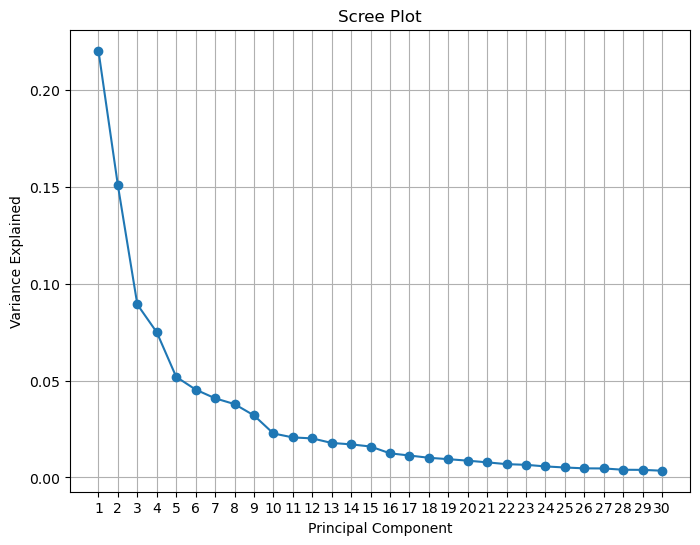

In [18]:
import matplotlib.pyplot as plt

# Variance explained by individual PCs
pca_score = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_score) + 1), pca_score, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(pca_score) + 1))
plt.grid(True)

plt.savefig("variance.png",dpi=600)
plt.show()

In [19]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('mordred_descriptors_updated_agonist.csv')

# Extract the SMILES column from the DataFrame
smiles_list = df['SMILES'].tolist()

# Print the list of SMILES
print(smiles_list)

['CCCCCOC(=O)C', 'CCCCCC(=O)C', 'CCCCO', 'CCC(=O)C', 'CCCCCCC/C=C/C=O', 'CC(C)CCC(=O)O', 'CCCCOC(=O)C', 'CCCC(=O)O', 'CCCCCC(=O)O', 'CC/C=C\\CCO', 'CC(=CCC/C(=C/C=O)/C)C', 'CCCCCCCCCC=O', 'CC(=O)C(=O)C', 'C=CCSCC=C', 'CC(=CCC/C(=C/COC(=O)C)/C)C', 'CCCCCCCOC(=O)C', 'CCCCCCOC(=O)CCC', 'CC(C)C=O', 'CC(C)C(=O)O', 'CC(C)CC(=O)O', 'CC(=CCCC(C)(C=C)O)C', 'CS', 'CCCCCCCCOC(=O)C', 'CCCCCCCC=O', 'CCCCCCCCCCC=O', 'CCCC(CCOC(=O)C)S', 'CCC(C(C)CO)S', 'CC(CO)CS', 'CCCCC(C(C)CO)S', 'CCCCCC(C(C)CO)S', 'CCCCCC/C=C\\CCC=O', 'CCCCCC(=O)C(C)C(=O)C', 'C[C@@H](CCC=C(C)C)CCO', 'CCCCCCCCCCO', 'CCCCCCCO', 'CCCCCCO', 'CCCCCCCCCO', 'CCCCCCCCO', 'CCCCCO', 'CCCCC(=O)C', 'CCCCCCCC(=O)C', 'CCCCCCC(=O)C', 'CCCC(=O)C', 'CCCC(=O)C(=O)C', 'CCCCC(=O)CC', 'CCCCCC(=O)CC', 'CCC(=O)C(=O)CC', 'CCCCCCC(=O)OCC=C', 'CCCCCC(=O)OCCCCC', 'CCCCOC(=O)C(C)OC(=O)CCC', 'CCCCOC=O', 'CCCCCCCCCC(=O)O', 'CCOC(=O)C(C)C', 'CC(=CCC/C(=C/CO)/C)C', 'CCCCCCC=O', 'CCCCCCC(=O)O', 'CCCCCC=O', 'CCCCCCOC(=O)C', 'CCCCCCCCC=O', 'CCCCCCCCCS', 'CCCCCCCCC(

## The next code performs K-means clustering on the PCA obtained data, to help understand the inherent patterns and groupings within the data. The SMILES present at the centroid of each clusters provide insight into the most common structural features within the cluster. This reduces the complexity of analyzing and highlights the key features of each clusters.
The Scatter plot visualizes the clusters and the SMILES present at the centroid of each clusters, conveying the nature of the clusters.

## The following code comprises of multiple methods which explain why n=5 is the optimal number of clusters.
Akaike Information Crtierion(AIC) and Bayesian Information Criterion(BIC) are statistical models for calculating the optimal number of clusters. Silhouette Score is a metric used to quantify the goodness of clusterings.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

nclusters = 4  # choose number of cluster
####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca

kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)

dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)

clusters = {}
clusterdists = {}
clustermins=[]
clusterorders_dict={}
clusterorders=np.zeros(X_kmeans.shape[0])

for x in range(nclusters):
    clusters[x] =[i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x]=[dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x]=[y for _,y in sorted(zip(clusterdists[x],clusters[x]))]

for i in clusters:
     print("Cluster", i+1, ":", len(clusters[i]), "data points")

# Calculate BIC and AIC scores
from sklearn.cluster import KMeans


bic_scores=[]
aic_scores=[]

for k_value in range(2, nclusters + 1):
    kmeans_k = KMeans(n_clusters=k_value, random_state=42)
    kmeans_k.fit(X_kmeans)

    # BIC calculation
    bic_score = (-2 * kmeans_k.score(X_kmeans) + np.log(len(X_kmeans)) * k_value * np.log(len(X_kmeans)))

    # AIC calculation
    aic_score = (-2 * kmeans_k.score(X_kmeans) + 2 * len(kmeans_k.cluster_centers_) * X_kmeans.shape[1])

    bic_scores.append(bic_score)
    aic_scores.append(aic_score)

best_k_bic=np.argmin(bic_scores)+2
best_k_aik =np.argmin(aic_scores)+2

print("Best number of clusters based on BIC:", best_k_bic)
print("Best number of clusters based on AIC:", best_k_aik)

# Calculate Silhouette Score

labels=kmeans.labels_
silhouette_avg=silhouette_score(X_use, labels)
print("Silhouette Score for", nclusters, "clusters:", silhouette_avg)

Cluster 1 : 66 data points
Cluster 2 : 11 data points
Cluster 3 : 12 data points
Cluster 4 : 13 data points
Best number of clusters based on BIC: 4
Best number of clusters based on AIC: 4
Silhouette Score for 4 clusters: 0.17017897767201934


## The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
Since the AIC and BIC scores for n=k is K, we take other methods into consideration.
The follwing code calculates the Davies Bouldin index, Calinski Harabasz Index, Silhouette score and the Elbow method.

The Davies-Bouldin plot begins to stabilize at n=5, in the Calinski-harabaz plot we see that one of its peak is reached at n=5 both of which suggest n=5 is an optimal number of clusters in our context. The sihouette score also supports n=5. While the elbow plot begins to flatten after and before n=6, n=5 is a more appropriate choice of clusters.

Variance explained by individual PCs: [0.22 0.15 0.09 0.07 0.05 0.05 0.04 0.04 0.03 0.02 0.02 0.02 0.02 0.02
 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.
 0.   0.  ] 

Total variance explained by PCs: 0.96
           0          1         2         3         4         5         6  \
0  -2.371687  -1.285443  1.474084 -5.657776 -4.279817  1.461266 -2.343700   
1  -5.079096  -2.471633  3.735952 -2.820600  0.510464 -1.420182  0.581376   
2 -10.359275  -8.270511 -2.736617  1.252151  1.531412  2.047061  4.552061   
3  -3.534979 -10.551236  4.889109 -5.270514  0.428998  0.190838 -2.020304   
4  -7.550441   4.321815 -1.318545  0.100254  0.525526 -4.009390  0.250605   

          7         8         9  ...        23        24        25        26  \
0 -0.717974  3.957585  1.832205  ...  0.407781 -1.546621 -0.418560  1.449920   
1  0.035156  1.576507  0.035810  ...  0.709406 -0.649718 -0.093121 -1.291175   
2 -0.256053  1.314722  0.552862  ... -0.967892 -0.706105 -1.350409 

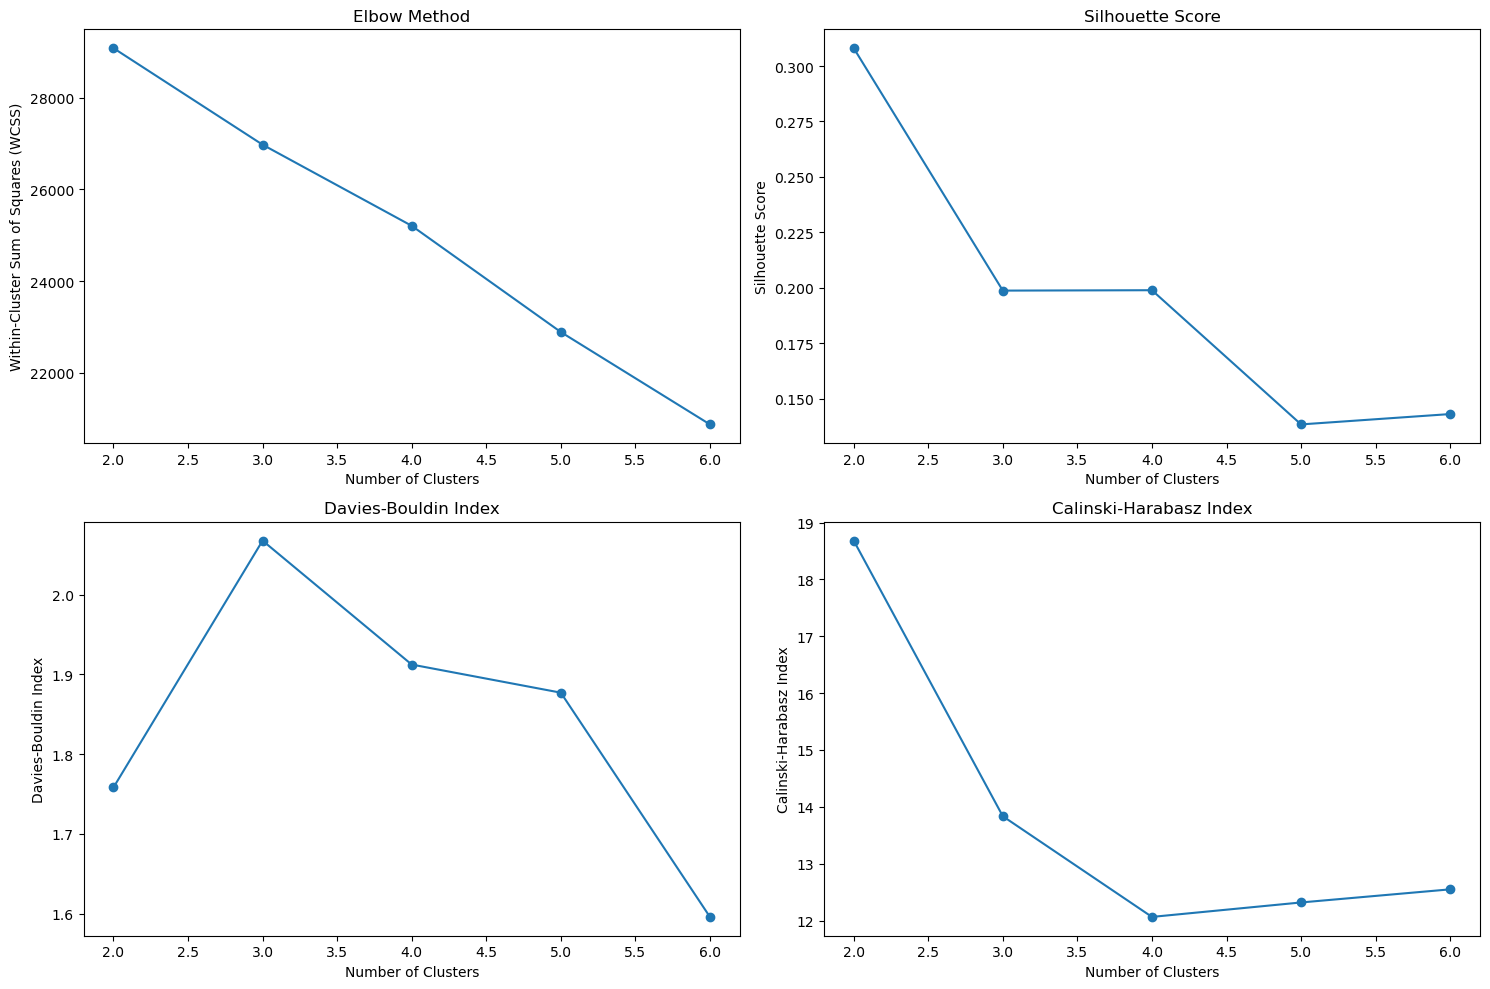

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# PCA and Data Preparation
# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number])

# If you want to keep track of non-numeric columns (like SMILES strings), you can do this:
non_numeric_df = df.select_dtypes(exclude=[np.number])

# Proceed with PCA on the numeric data
X_all = np.array(numeric_df)
X_all_ids = np.array(numeric_df.index)

scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)  # Standardize the data

pca = PCA(n_components=30)  # Choose the number of PCs
X_all_pca = pca.fit_transform(X_all_sc)  # Apply PCA transformation

pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:', np.around(pca.explained_variance_ratio_, decimals=2), '\n')
print('Total variance explained by PCs:', np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

# Recreate DataFrame with original index after PCA transformation
df_pca = pd.DataFrame(X_all_pca, index=X_all_ids)

# If you want to combine the PCA results with the non-numeric data, you can do this:
df_pca_combined = pd.concat([df_pca, non_numeric_df], axis=1)

print(df_pca_combined.head())

# Clustering Evaluation
# Range of cluster counts to consider
cluster_range = range(2, 7)  # You can adjust this range

# Lists to store evaluation scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
wcss = []  # Within-cluster sum of squares for elbow method

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_all_pca)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(X_all_pca, kmeans.labels_))
    
    # Davies-Bouldin Index
    davies_bouldin_scores.append(davies_bouldin_score(X_all_pca, kmeans.labels_))
    
    # Calinski-Harabasz Index
    calinski_harabasz_scores.append(calinski_harabasz_score(X_all_pca, kmeans.labels_))
    
    # WCSS for elbow method
    wcss.append(kmeans.inertia_)

# Create a figure for all the plots
plt.figure(figsize=(15, 10))

# Plotting Elbow Method
plt.subplot(2, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')

# Plotting Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Plotting Davies-Bouldin Index
plt.subplot(2, 2, 3)
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')

# Plotting Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file with 600 DPI
plt.savefig('cluster_evaluation_plots.png', dpi=600)

# Show the plots
plt.show()


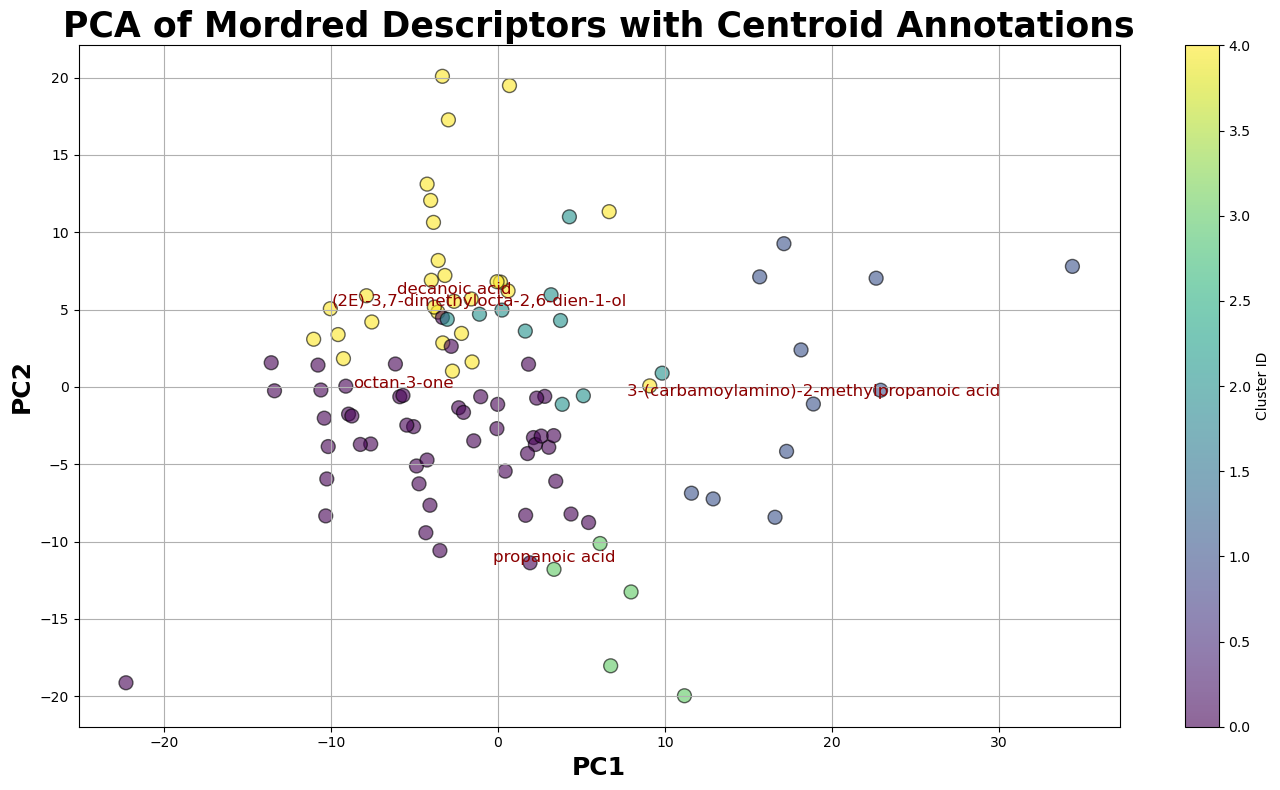

Cluster 1 centroid - SMILES: CCCCCC(=O)CC, PubChem name: octan-3-one
Cluster 2 centroid - SMILES: CC(CNC(=O)N)C(=O)O, PubChem name: 3-(carbamoylamino)-2-methylpropanoic acid
Cluster 3 centroid - SMILES: CC(=CCC/C(=C/CO)/C)C, PubChem name: (2E)-3,7-dimethylocta-2,6-dien-1-ol
Cluster 4 centroid - SMILES: CCC(=O)O, PubChem name: propanoic acid
Cluster 5 centroid - SMILES: CCCCCCCCCC(=O)O, PubChem name: decanoic acid


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pubchempy as pcp

# Load the CSV file into a DataFrame
df = pd.read_csv('mordred_descriptors_updated_agonist.csv')

# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

# Create a DataFrame containing only numeric features for scaling and PCA
X_data = df.drop(columns=['SMILES'])
X_all = np.array(X_data)
X_all_ids = np.array(df.index)

# Scaling the data
scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)

# PCA transformation
pca = PCA(n_components=30)
X_all_pca = pca.fit_transform(X_all_sc)

# Clustering using KMeans
nclusters = 5
kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_all_pca)
dists = [np.linalg.norm(X_all_pca[i] - kmeans.cluster_centers_[kmeans.labels_[i]]) for i in range(len(X_all_pca))]

# Finding centroids
clusters = {i: [] for i in range(nclusters)}
for i, label in enumerate(kmeans.labels_):
    clusters[label].append(i)
clustermins = [min(clusters[i], key=lambda x: dists[x]) for i in range(nclusters)]

# Preparing for visualization
f_ind_1, f_ind_2 = 0, 1
x_min, x_max = X_all_pca[:, f_ind_1].min() - 1, X_all_pca[:, f_ind_1].max() + 1
y_min, y_max = X_all_pca[:, f_ind_2].min() - 1, X_all_pca[:, f_ind_2].max() + 1

# Function to retrieve PubChem names using SMILES
def smiles_to_pubchem_name(smiles):
    try:
        compounds = pcp.get_compounds(smiles, 'smiles')
        return compounds[0].iupac_name if compounds else "Unknown"
    except Exception as e:
        return "Unknown"

# Retrieve PubChem names for centroid molecules
pubchem_at_centroids = [smiles_to_pubchem_name(df.loc[X_all_ids[centroid]]['SMILES']) for centroid in clustermins]

# Font size and point size options
title_fontsize = 25
label_fontsize = 18
annotation_fontsize = 12
point_size = 100  

# Plotting the results
plt.figure(figsize=(14, 8))
plt.scatter(X_all_pca[:, f_ind_1], X_all_pca[:, f_ind_2], c=kmeans.labels_, cmap='viridis', alpha=0.6, s=point_size, edgecolor='k')
for i, centroid in enumerate(clustermins):
    plt.text(X_all_pca[centroid, f_ind_1], X_all_pca[centroid, f_ind_2] + 0.5, pubchem_at_centroids[i], fontsize=annotation_fontsize, ha='center', color='darkred', wrap=True)
plt.title('PCA of Mordred Descriptors with Centroid Annotations', fontsize=title_fontsize, fontweight='bold')
plt.xlabel('PC1', fontsize=label_fontsize, fontweight='bold')
plt.ylabel('PC2', fontsize=label_fontsize, fontweight='bold')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.tight_layout()
plt.savefig("mordred_pca_plot_wider.png", dpi=800)
plt.show()

# Printing centroid PubChem names and SMILES
for i, centroid in enumerate(clustermins):
    smiles = df.loc[X_all_ids[centroid]]['SMILES']
    name = pubchem_at_centroids[i]
    print(f"Cluster {i+1} centroid - SMILES: {smiles}, PubChem name: {name}")

## The structures closest to the centroids are printed below

In [27]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

# Assuming df, X_all_pca, kmeans, nclusters, and clustermins are already defined from previous cells

def get_top_molecules(X, labels, centroids, df, clustermins, n_top=4):
    results = {}
    for i in range(len(centroids)):
        # Get indices of molecules in this cluster
        cluster_indices = np.where(labels == i)[0]
        
        # Calculate distances to centroid for all molecules in this cluster
        distances = [euclidean(X[j], centroids[i]) for j in cluster_indices]
        
        # Sort indices by distance
        sorted_indices = [x for _, x in sorted(zip(distances, cluster_indices))]
        
        # Get centroid molecule (already identified) and next 4 closest molecules
        top_indices = [clustermins[i]] + [idx for idx in sorted_indices if idx != clustermins[i]][:n_top]
        
        # Retrieve SMILES and calculate distances for top molecules
        top_molecules = []
        for idx in top_indices:
            smiles = df.iloc[idx]['SMILES']
            distance = euclidean(X[idx], centroids[i])
            top_molecules.append((smiles, distance))
        
        results[f"Cluster_{i+1}"] = top_molecules
    
    return results

# Get centroid molecule and 4 next closest molecules for each cluster
top_molecules = get_top_molecules(X_all_pca, kmeans.labels_, kmeans.cluster_centers_, df, clustermins, n_top=10)

# Print results
for cluster, molecules in top_molecules.items():
    print(f"\n{cluster}:")
    for i, (smiles, distance) in enumerate(molecules):
        if i == 0:
            print(f"  Centroid Molecule:")
        elif i == 1:
            print(f"  Next 4 Closest Molecules:")
        print(f"    {i}. SMILES: {smiles}")
        print(f"       Distance to centroid: {distance:.4f}")

# Create a DataFrame with the results
results_df = pd.DataFrame([
    {
        'Cluster': f"{cluster}",
        'Rank': 'Centroid' if i == 0 else f'Top_{i}',
        'SMILES': mol[0],
        'Distance': mol[1]
    }
    for cluster, molecules in top_molecules.items()
    for i, mol in enumerate(molecules)
])

# Display the DataFrame
print("\nResults DataFrame:")
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('top_molecules_per_cluster.csv', index=False)
print("\nResults saved to 'top_molecules_per_cluster.csv'")


Cluster_1:
  Centroid Molecule:
    0. SMILES: CCCCCC(=O)CC
       Distance to centroid: 7.4280
  Next 4 Closest Molecules:
    1. SMILES: CCCCCC(=O)C
       Distance to centroid: 7.6784
    2. SMILES: CCCCC(=O)CC
       Distance to centroid: 7.9155
    3. SMILES: CCCCC(=O)C
       Distance to centroid: 8.0213
    4. SMILES: CCCCCCC(=O)C
       Distance to centroid: 8.0288
    5. SMILES: CCCCCC=O
       Distance to centroid: 8.5495
    6. SMILES: CCCCCC(=O)O
       Distance to centroid: 9.0444
    7. SMILES: CCCCCCCC(=O)C
       Distance to centroid: 9.0607
    8. SMILES: CCCCCCC=O
       Distance to centroid: 9.1026
    9. SMILES: CCCCC(=O)O
       Distance to centroid: 9.4465
    10. SMILES: CC/C=C\CCO
       Distance to centroid: 9.5308

Cluster_2:
  Centroid Molecule:
    0. SMILES: CC(CNC(=O)N)C(=O)O
       Distance to centroid: 14.0510
  Next 4 Closest Molecules:
    1. SMILES: C(CC(=O)O)C(=O)C(=O)O
       Distance to centroid: 14.5959
    2. SMILES: C(C(C(=O)O)N)N
       Distan

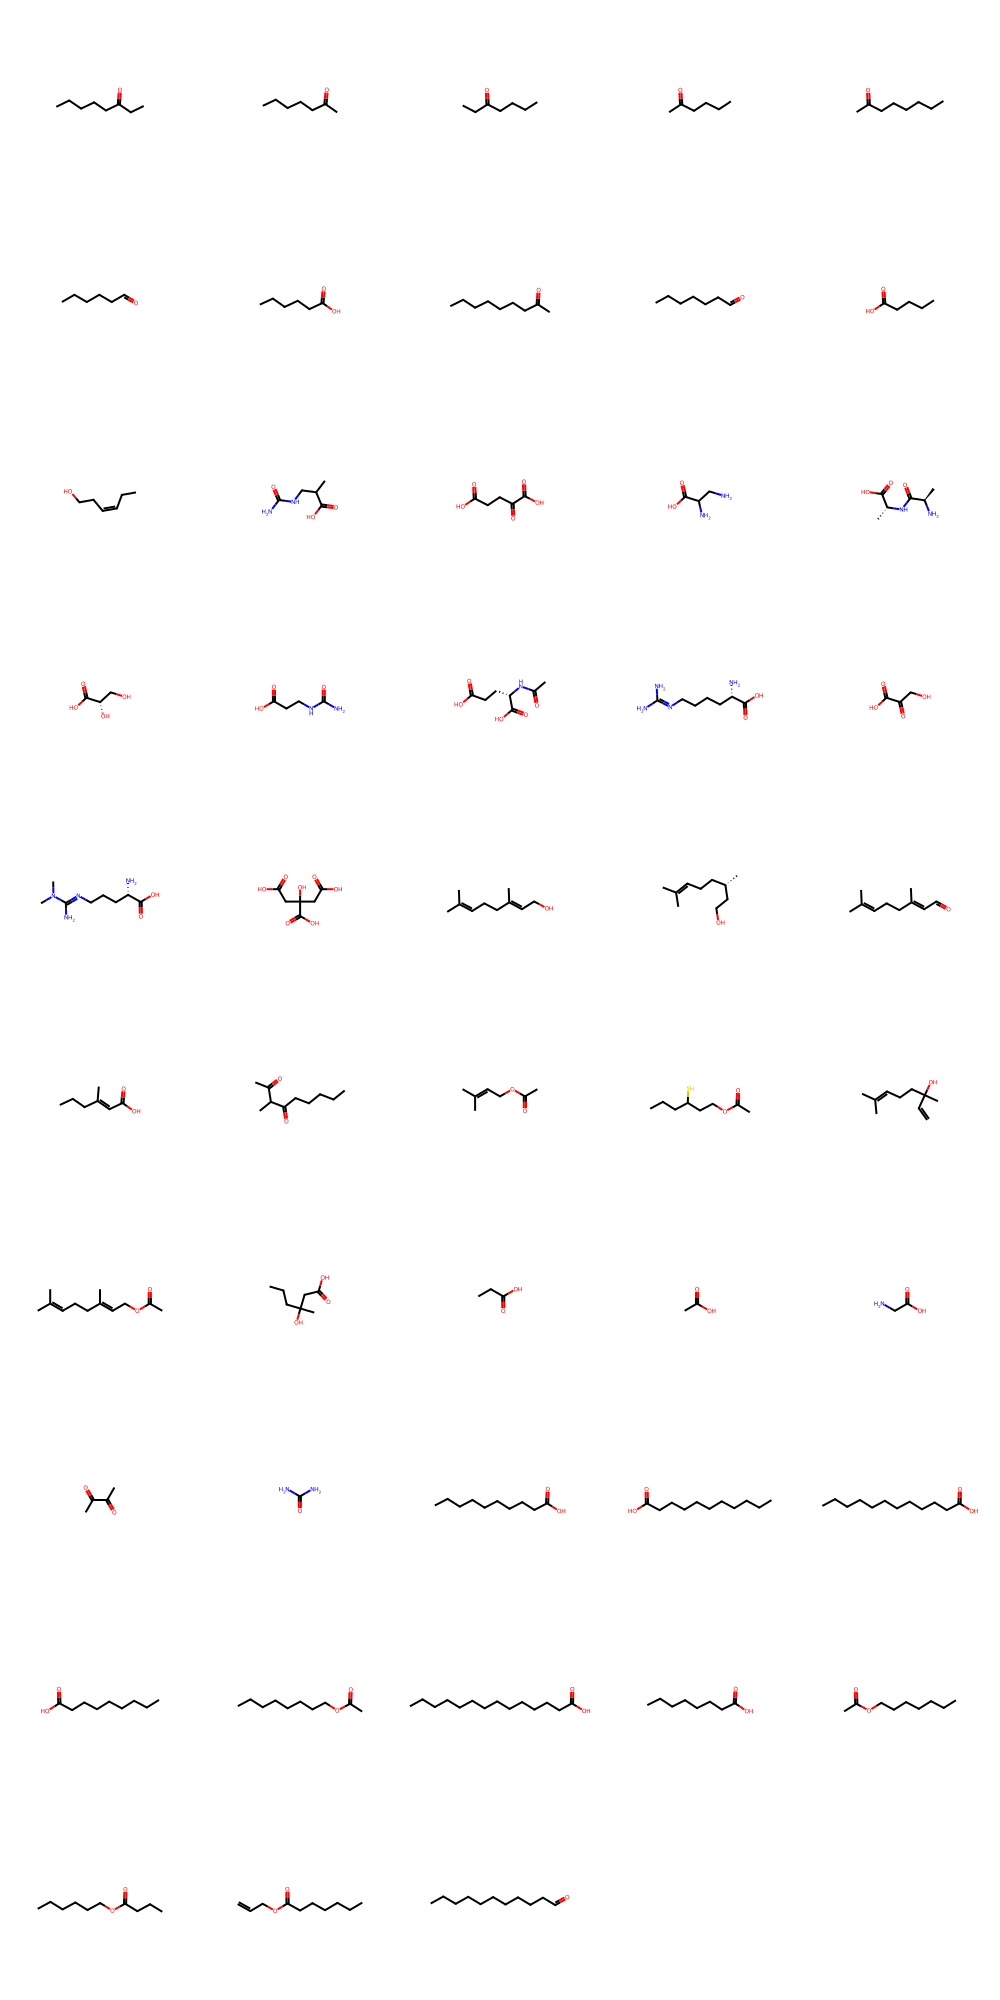

In [35]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import SVG, display

# Load the dataset
file_path = "top_molecules_per_cluster.csv"
df = pd.read_csv(file_path)

# Get unique SMILES strings for visualization
smiles_list = df['SMILES'].unique()

# Convert SMILES to RDKit molecule objects, filter out invalid ones
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if Chem.MolFromSmiles(smiles)]

# Generate the image grid for the valid molecules in SVG format
svg = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200), useSVG=True)

# Display the SVG content in the notebook
display(SVG(svg.data))


In [38]:
import pandas as pd
import requests

# Load the dataset
file_path = "top_molecules_per_cluster.csv"
df = pd.read_csv(file_path)

# Function to fetch the molecule name from PubChem using SMILES
def fetch_molecule_name(smiles):
    try:
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{smiles}/property/IUPACName/JSON"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data['PropertyTable']['Properties'][0]['IUPACName']
        else:
            return "Name not found"
    except Exception as e:
        return "Error"

# Apply the function to the SMILES column
df['name'] = df['SMILES'].apply(fetch_molecule_name)

# Save the updated dataframe to a new CSV file
output_file = "top_molecules_with_names.csv"
df.to_csv(output_file, index=False)

print(f"Updated dataset saved as {output_file}")


Updated dataset saved as top_molecules_with_names.csv


## Get the pdb structures of these 20 molecules 

In [39]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

# Load the dataset
file_path = "top_molecules_with_names.csv"
df = pd.read_csv(file_path)

# Extract SMILES and molecule names
smiles_list = df['SMILES']
common_names = df['name']

# Create folder TOP_MOLS if it doesn't exist
output_dir = "TOP_MOLS"
os.makedirs(output_dir, exist_ok=True)

# Function to save PDB structure
def save_pdb(smiles, name):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Invalid SMILES: {smiles}")
            return
        mol = Chem.AddHs(mol)  # Add hydrogens
        AllChem.EmbedMolecule(mol)  # Generate 3D coordinates
        AllChem.UFFOptimizeMolecule(mol)  # Optimize geometry
        pdb_block = Chem.MolToPDBBlock(mol)  # Convert to PDB format
        pdb_file_path = os.path.join(output_dir, f"{name}.pdb")
        with open(pdb_file_path, "w") as f:
            f.write(pdb_block)
        print(f"Saved PDB for {name}")
    except Exception as e:
        print(f"Error processing {name} ({smiles}): {e}")

# Save PDB structures
for smiles, name in zip(smiles_list, common_names):
    if pd.notna(smiles) and pd.notna(name):  # Ensure neither SMILES nor name is NaN
        save_pdb(smiles, name)



Saved PDB for octan-3-one
Saved PDB for heptan-2-one
Saved PDB for heptan-3-one
Saved PDB for hexan-2-one
Saved PDB for octan-2-one
Saved PDB for hexanal
Saved PDB for hexanoic acid
Saved PDB for nonan-2-one
Saved PDB for heptanal
Saved PDB for pentanoic acid
Saved PDB for Name not found
Saved PDB for 3-(carbamoylamino)-2-methylpropanoic acid
Saved PDB for 2-oxopentanedioic acid
Saved PDB for 2,3-diaminopropanoic acid
Saved PDB for (2R)-2-[[(2R)-2-aminopropanoyl]amino]propanoic acid
Saved PDB for (2S)-2,3-dihydroxypropanoic acid
Saved PDB for 3-(carbamoylamino)propanoic acid
Saved PDB for (2S)-2-acetamidopentanedioic acid
Saved PDB for (2S)-2-amino-6-(diaminomethylideneamino)hexanoic acid
Saved PDB for 3-hydroxy-2-oxopropanoic acid
Saved PDB for (2S)-2-amino-5-[[amino(dimethylamino)methylidene]amino]pentanoic acid
Saved PDB for 2-hydroxypropane-1,2,3-tricarboxylic acid
Saved PDB for Name not found
Saved PDB for (3S)-3,7-dimethyloct-6-en-1-ol
Saved PDB for Name not found
Saved PDB for N

## Co-relation Analysis for the selected descriptors over the range of molecules.
First, we take 7 descriptors that define the drug-likliness and odor-ness of our molecules. These include:

1) Quantitative Estimate of Druglikeness
2) Logp(lipophilicity)
3) Molecular Weight
4) Topology Polar Surface Area
5) Number of Rotatable Bonds
6) Radius of Gyration

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED, MolSurf
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
from rdkit.Chem import Descriptors3D
import pandas as pd

In [ ]:
# Define the list of SMILES strings
smiles_list = [
"CCCCCC\C=C\C=O", "CCCCCC\C=C/C=O","CCCCC\C=C/C=O", "CCC=CCC=CCC=O","CCC(=O)O","CCCC(=O)O","CC(C)C(O)=O",
"CCC(C)C(=O)O","CCCCCC(=O)OCC","CCCCC(=O)OCC","CCCCCOC(=O)CC","CCCCCCOC(=O)C","CCC(C)CO","CC(C)CCO",
"CCC(C)C=O","CC\C=C/CCO","CCCSSCCC","CSCSC","CSSSC","CSSC"
]

# Initialize empty lists to store calculated properties
qed_values = []
logp_values = []
mol_weight_values = []
tpsa_values = []
num_rotatable_bonds_values = []

for smiles in smiles_list:
    # Create molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Calculate properties and append to respective lists
    qed_values.append(QED.qed(molecule))
    logp_values.append(Descriptors.MolLogP(molecule))
    mol_weight_values.append(Descriptors.MolWt(molecule))
    tpsa_values.append(Descriptors.TPSA(molecule))
    num_rotatable_bonds_values.append(Descriptors.NumRotatableBonds(molecule))

# Create dataframe
df = pd.DataFrame({
    'SMILES': smiles_list,
    'QED': qed_values,
    'LogP': logp_values,
    'Molecular_Weight': mol_weight_values,
    'Topological_Polar_Surface_Area': tpsa_values,
    'Number_of_Rotatable_Bonds': num_rotatable_bonds_values,
})

# Save dataframe to a CSV file
df.to_csv("plot_data.csv", index=False)

## Calculating Radius of Gyration

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors3D

In [ ]:
# Define the list of SMILES strings
smiles_list = [
"CCCCCC\C=C\C=O", "CCCCCC\C=C/C=O","CCCCC\C=C/C=O", "CCC=CCC=CCC=O","CCC(=O)O","CCCC(=O)O","CC(C)C(O)=O",
"CCC(C)C(=O)O","CCCCCC(=O)OCC","CCCCC(=O)OCC","CCCCCOC(=O)CC","CCCCCCOC(=O)C","CCC(C)CO","CC(C)CCO",
"CCC(C)C=O","CC\C=C/CCO","CCCSSCCC","CSCSC","CSSSC","CSSC"
]

radius_of_gyration = []

for smiles in smiles_list:
    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))


# Load the existing DataFrame
df = pd.read_csv("plot_data.csv")

# Add the radius of gyration to the DataFrame
df['RadiusOfGyration'] = radius_of_gyration

# Save the updated DataFrame back to the CSV file
df.to_csv("plot_data.csv", index=False)

In [ ]:
df_updated = pd.read_csv("plot_data.csv")
df_updated

,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,CCCCCC\C=C\C=O,0.314760,2.7119,140.226,17.07,6,3.233467
1,CCCCCC\C=C/C=O,0.314760,2.7119,140.226,17.07,6,3.157950
2,CCCCC\C=C/C=O,0.313677,2.3218,126.199,17.07,5,2.720531
3,CCC=CCC=CCC=O,0.421095,2.4879,138.210,17.07,5,3.187139
4,CCC(=O)O,0.490845,0.4810,74.079,37.30,1,1.558886
5,CCCC(=O)O,0.543441,0.8711,88.106,37.30,2,1.907807
6,CC(C)C(O)=O,0.512604,0.7270,88.106,37.30,1,1.677693
7,CCC(C)C(=O)O,0.566819,1.1171,102.133,37.30,2,1.842107
8,CCCCCC(=O)OCC,0.436174,2.1298,144.214,26.30,5,2.924072
9,CCCCC(=O)OCC,0.541673,1.7397,130.187,26.30,4,2.694746


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# Load the data
df = pd.read_csv('plot_data.csv')

# List of SMILES strings
smiles_list = df['SMILES'].tolist()

# Initialize list to store common names
common_names = []

# Loop over the list
for smiles in smiles_list:
    # Check if SMILES string is not None
    if smiles is not None:
        try:
            # Convert SMILES to RDKit Mol object
            mol = Chem.MolFromSmiles(smiles)
            
            if mol:
                # Get the common name using the molecular formula
                common_name = Chem.rdMolDescriptors.CalcMolFormula(mol)
                common_names.append(common_name)
            else:
                common_names.append(None)
        except Exception as e:
            print(f"Error processing SMILES: {smiles}, Exception: {e}")
            common_names.append(None)
    else:
        common_names.append(None)

# Add the common names as a new column to the dataframe
df.insert(0, 'Common_name', common_names)

# Save the DataFrame to a new CSV file
df.to_csv("plot_data_with_names.csv", index=False)

df.head(20)

,Common_name,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,C9H16O,CCCCCC\C=C\C=O,0.314760,2.7119,140.226,17.07,6,3.233467
1,C9H16O,CCCCCC\C=C/C=O,0.314760,2.7119,140.226,17.07,6,3.157950
2,C8H14O,CCCCC\C=C/C=O,0.313677,2.3218,126.199,17.07,5,2.720531
3,C9H14O,CCC=CCC=CCC=O,0.421095,2.4879,138.210,17.07,5,3.187139
4,C3H6O2,CCC(=O)O,0.490845,0.4810,74.079,37.30,1,1.558886
5,C4H8O2,CCCC(=O)O,0.543441,0.8711,88.106,37.30,2,1.907807
6,C4H8O2,CC(C)C(O)=O,0.512604,0.7270,88.106,37.30,1,1.677693
7,C5H10O2,CCC(C)C(=O)O,0.566819,1.1171,102.133,37.30,2,1.842107
8,C8H16O2,CCCCCC(=O)OCC,0.436174,2.1298,144.214,26.30,5,2.924072
9,C7H14O2,CCCCC(=O)OCC,0.541673,1.7397,130.187,26.30,4,2.694746


## Heatmap generation - The above analysis is further used to create a heatmap to visually represent the relationship between the descriptors.

                       QED      LogP  Mol.weight      TPSA  Rotatable Bonda  \
QED               1.000000 -0.707563   -0.588473  0.266033        -0.742227   
LogP             -0.707563  1.000000    0.918521 -0.567251         0.838362   
Mol.weight       -0.588473  0.918521    1.000000 -0.291268         0.899306   
TPSA              0.266033 -0.567251   -0.291268  1.000000        -0.109819   
Rotatable Bonda  -0.742227  0.838362    0.899306 -0.109819         1.000000   
RadiusOfGyration -0.699185  0.829537    0.911769 -0.102033         0.978793   

                  RadiusOfGyration  
QED                      -0.699185  
LogP                      0.829537  
Mol.weight                0.911769  
TPSA                     -0.102033  
Rotatable Bonda           0.978793  
RadiusOfGyration          1.000000  


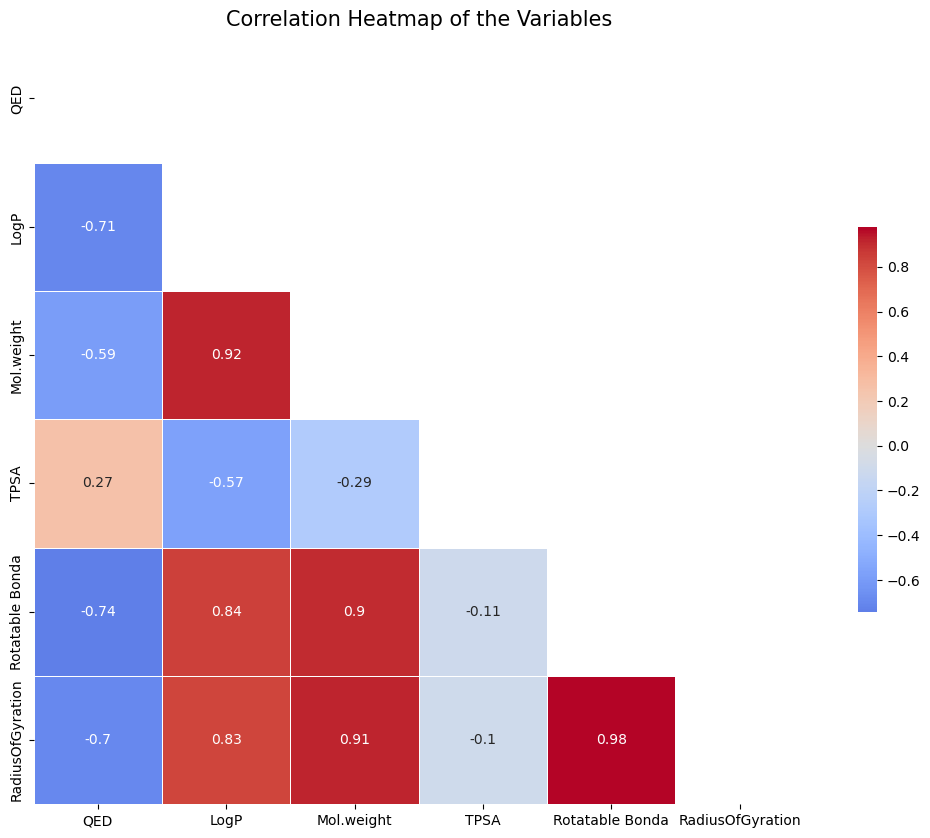

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the csv file
data = pd.read_csv('plot_data_with_names.csv')

# Select only the numeric columns for the correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix using Pearson's correlation coefficient
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set the size of the figure
plt.figure(figsize=(14, 10))

# Generate a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title of the figure
plt.title('Correlation Heatmap of the Variables', fontsize=15)

# Show the plot
plt.savefig("Corelation_heat_plot.png",dpi=600)
plt.show()

## The correlation analysis is extended to the appended list of the 62 odorants and the 20 most similar molecules.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED, MolSurf
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
from rdkit.Chem import Descriptors3D
import pandas as pd

In [ ]:
input_csv_file = "OR_AGONIST_update2_NOCYC.csv"
data = pd.read_csv(input_csv_file)

# Extract SMILES column from the dataframe
smiles_list = data["SMILES"].tolist()

# Initialize empty lists to store calculated properties
qed_values = []
logp_values = []
mol_weight_values = []
tpsa_values = []
num_rotatable_bonds_values = []

for smiles in smiles_list:
    # Create molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Calculate properties and append to respective lists
    qed_values.append(QED.qed(molecule))
    logp_values.append(Descriptors.MolLogP(molecule))
    mol_weight_values.append(Descriptors.MolWt(molecule))
    tpsa_values.append(Descriptors.TPSA(molecule))
    num_rotatable_bonds_values.append(Descriptors.NumRotatableBonds(molecule))

# Create dataframe
df = pd.DataFrame({
    'SMILES': smiles_list,
    'QED': qed_values,
    'LogP': logp_values,
    'Molecular_Weight': mol_weight_values,
    'Topological_Polar_Surface_Area': tpsa_values,
    'Number_of_Rotatable_Bonds': num_rotatable_bonds_values,
})

# Save dataframe to a CSV file
df.to_csv('plotting_62X.csv', index=False)

## Calculating the Radius of Gyration



In [ ]:
input_csv_file = "OR_AGONIST_update2_NOCYC.csv"
data = pd.read_csv(input_csv_file)

# Extract SMILES column from the dataframe
smiles_list = data["SMILES"].tolist()
radius_of_gyration = []

for smiles in smiles_list:
    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))


# Load the existing DataFrame
df = pd.read_csv('plotting_62X.csv')

# Add the radius of gyration to the DataFrame
df['RadiusOfGyration'] = radius_of_gyration

# Save the updated DataFrame back to the CSV file
df.to_csv('plotting_NONCX.csv', index=False)

In [ ]:
df_updated = pd.read_csv('plotting_NONCX.csv')
df_updated

,SMILES,QED,LogP,Molecular_Weight,Topological_Polar_Surface_Area,Number_of_Rotatable_Bonds,RadiusOfGyration
0,CCCCOC(=O)C(C)OC(=O)CCC,0.482575,2.0615,216.277,52.60,7,3.528937
1,CCCCC(=O)O,0.582072,1.2612,102.133,37.30,3,1.927542
2,CC(C)CCC(=O)O,0.606401,1.5072,116.160,37.30,3,2.128624
3,CCCC(C)C(=O)O,0.606401,1.5072,116.160,37.30,3,1.988005
4,CCC(C)CC(=O)O,0.606401,1.5072,116.160,37.30,3,2.181004
5,CCCCCCCC=CC(=O)O,0.470804,2.9877,170.252,37.30,7,3.105849
6,CC(C)CC(=O)O,0.566819,1.1171,102.133,37.30,2,1.787025
7,CCCCCCCCC(=O)O,0.578320,2.8216,158.241,37.30,7,3.140992
8,CCC(C)CC(=O)O,0.606401,1.5072,116.160,37.30,3,2.089370
9,CC(C)CCC(=O)O,0.606401,1.5072,116.160,37.30,3,2.370734


## independent molecular analysis